In [112]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv('realistic_attempt.csv',on_bad_lines='skip')
# df = pd.read_csv('large_dataset.csv',on_bad_lines='skip')

In [114]:
df.columns = df.iloc[0]

In [115]:
df = df[1:]

In [116]:
df.columns

Index([                               'Utilization (%)',
                                             'Eff Freq',
                                     'IPC (Sys + User)',
                                     'CPI (Sys + User)',
                           'Branch Misprediction Ratio',
                            'IC (32B) Fetch Miss Ratio',
                      'Op Cache (64B) Fetch Miss Ratio',
                                      'IC Access (pti)',
                                        'IC Miss (pti)',
                                      'DC Access (pti)',
                         'DC Fills From Same CCX (pti)',
       'DC Fills From different CCX in same node (pti)',
                     'DC Fills From Local Memory (pti)',
                 'DC Fills From Remote CCX Cache (pti)',
                    'DC Fills From Remote Memory (pti)',
                                   'All DC Fills (pti)',
                                      'L2 Access (pti)',
                         'L2 Ac

In [117]:
df = df.iloc[:,:-1]

In [118]:
df = df.astype(float)

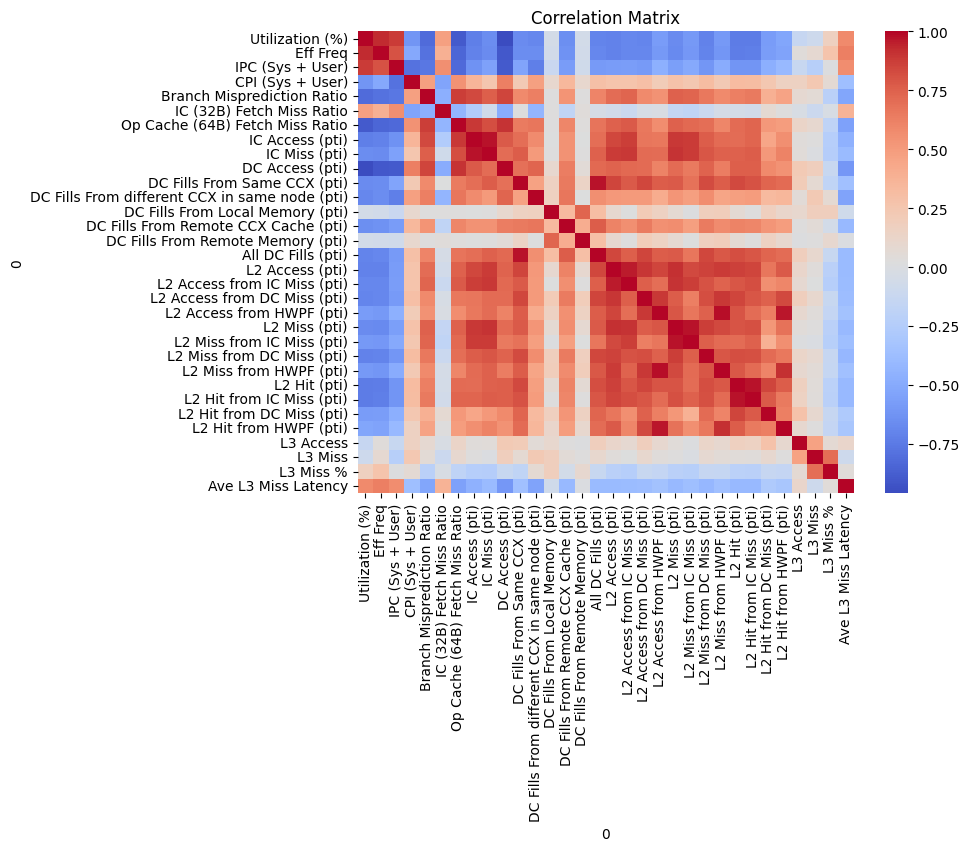

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [120]:
df.corr()['IPC (Sys + User)']

0
Utilization (%)                                   0.878753
Eff Freq                                          0.804800
IPC (Sys + User)                                  1.000000
CPI (Sys + User)                                 -0.791497
Branch Misprediction Ratio                       -0.767913
IC (32B) Fetch Miss Ratio                         0.563206
Op Cache (64B) Fetch Miss Ratio                  -0.823774
IC Access (pti)                                  -0.638395
IC Miss (pti)                                    -0.548083
DC Access (pti)                                  -0.892112
DC Fills From Same CCX (pti)                     -0.533511
DC Fills From different CCX in same node (pti)   -0.728396
DC Fills From Local Memory (pti)                 -0.123791
DC Fills From Remote CCX Cache (pti)             -0.578379
DC Fills From Remote Memory (pti)                -0.076750
All DC Fills (pti)                               -0.588263
L2 Access (pti)                                  -0.58

In [121]:
df.head()

,Utilization (%),Eff Freq,IPC (Sys + User),CPI (Sys + User),Branch Misprediction Ratio,IC (32B) Fetch Miss Ratio,Op Cache (64B) Fetch Miss Ratio,IC Access (pti),IC Miss (pti),DC Access (pti),...,L2 Miss from DC Miss (pti),L2 Miss from HWPF (pti),L2 Hit (pti),L2 Hit from IC Miss (pti),L2 Hit from DC Miss (pti),L2 Hit from HWPF (pti),L3 Access,L3 Miss,L3 Miss %,Ave L3 Miss Latency
1,0.48,1433.88,0.37,2.69,0.05,0.22,0.53,240.63,52.40,576.58,...,6.55,8.55,25.79,17.75,1.53,5.70,22468.0,1876.0,8.35,359.47
2,0.45,1477.17,0.38,2.64,0.05,0.22,0.53,237.75,51.30,587.50,...,6.39,2.68,19.89,14.36,1.30,0.37,4324.0,368.0,8.51,268.62
3,0.47,1473.68,0.37,2.73,0.05,0.20,0.56,248.74,49.81,587.40,...,6.32,2.99,19.80,18.06,1.44,0.47,4216.0,332.0,7.87,289.11
4,0.47,1457.19,0.37,2.73,0.05,0.20,0.57,251.74,50.33,584.03,...,6.55,3.12,20.54,17.79,1.38,0.35,4305.0,378.0,8.78,349.14
5,0.29,2894.31,0.29,3.48,0.05,0.18,0.57,272.79,50.05,592.56,...,6.23,2.54,21.09,18.96,1.32,0.37,279813.0,215759.0,77.11,568.01


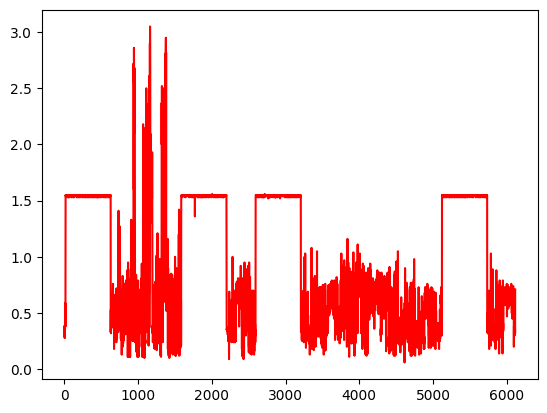

In [122]:
plt.plot(np.arange(len(df['IPC (Sys + User)'])),df['IPC (Sys + User)'],'r-')
plt.show()

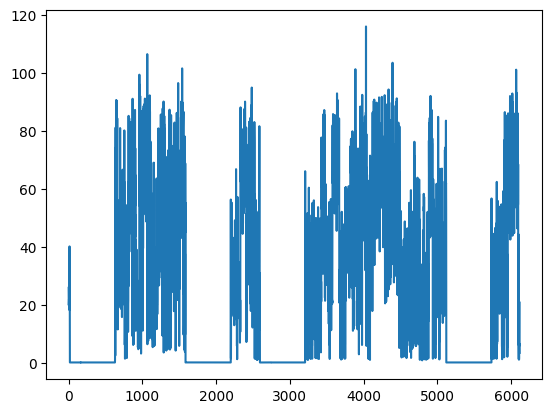

In [123]:
plt.plot(np.arange(len(df['L2 Hit (pti)'])),df['L2 Hit (pti)'])
plt.show()

In [124]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor

In [125]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [126]:
df = normalize(df)

In [127]:
y = df['IPC (Sys + User)']
df.drop('IPC (Sys + User)',inplace=True,axis=1)
df.drop('CPI (Sys + User)',inplace=True,axis=1)
df.drop('Utilization (%)',inplace=True,axis=1)
df.drop('Eff Freq',inplace=True,axis=1)
X = df

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=102)

In [129]:
params = {
    "n_estimators": 300,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


regressor = ensemble.GradientBoostingRegressor(**params)
regressor.fit(X_train,Y_train)

mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

mae = mean_absolute_error(Y_test, regressor.predict(X_test))
print("The MAE on test set: {:.4f}".format(mae))

bagging_regressor = BaggingRegressor(n_estimators=600, n_jobs=-1, random_state=102)
bagging_regressor.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, bagging_regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

mae = mean_absolute_error(Y_test, bagging_regressor.predict(X_test))
print("The MAE on test set: {:.4f}".format(mae))

regressor = bagging_regressor

The mean squared error (MSE) on test set: 0.0029
The MAE on test set: 0.0280
The mean squared error (MSE) on test set: 0.0026
The MAE on test set: 0.0207


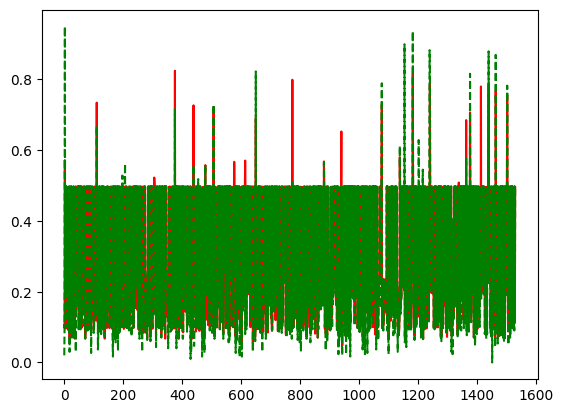

In [130]:
plt.plot(np.arange(len(X_test)),regressor.predict(X_test),'r')
plt.plot(np.arange(len(X_test)),Y_test,'g--')

plt.show()

/tmp/ipykernel_53578/952337784.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(200),Y_test[400:600],'g--')


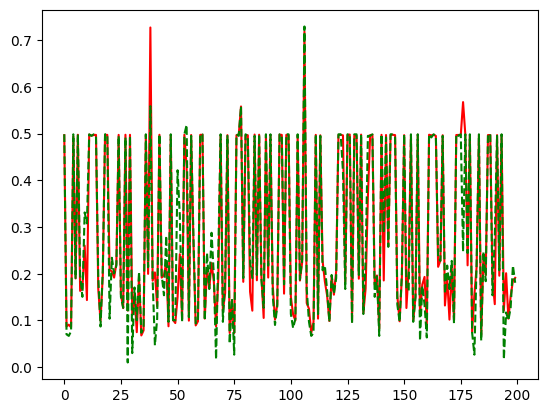

In [131]:
plt.plot(np.arange(200),regressor.predict(X_test[400:600]),'r')
plt.plot(np.arange(200),Y_test[400:600],'g--')

plt.show()

In [132]:
mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(len(Y_test))

The mean squared error (MSE) on test set: 0.0026
1529


In [133]:
df_test = pd.read_csv('test_set.csv',on_bad_lines='skip')
df_test.columns = df_test.iloc[0]
df_test = df_test[1:]
df_test = df_test.iloc[:,:-1]
df_test = df_test.astype(float)
df_test = normalize(df_test)
y_true_test = df_test['IPC (Sys + User)']
df_test.drop('IPC (Sys + User)',inplace=True,axis=1)
df_test.drop('CPI (Sys + User)',inplace=True,axis=1)
df_test.drop('Utilization (%)',inplace=True,axis=1) #$---FOR NOW!
df_test.drop('Eff Freq',inplace=True,axis=1)
X_true_test = df_test

In [134]:
mse = mean_squared_error(y_true_test, regressor.predict(X_true_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0102


/tmp/ipykernel_53578/3681836976.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(500),y_true_test[700:1200],'g--')


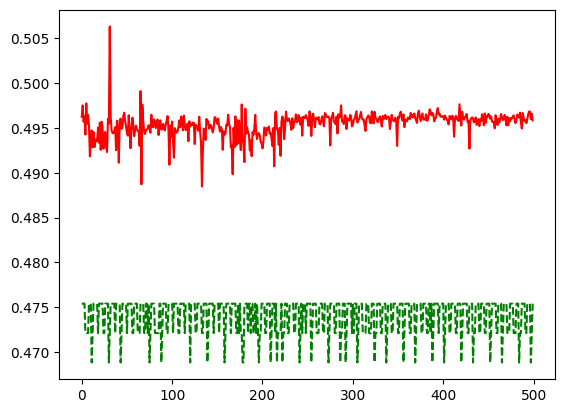

In [135]:
plt.plot(np.arange(500),regressor.predict(X_true_test[700:1200]),'r')
plt.plot(np.arange(500),y_true_test[700:1200],'g--')

plt.show()

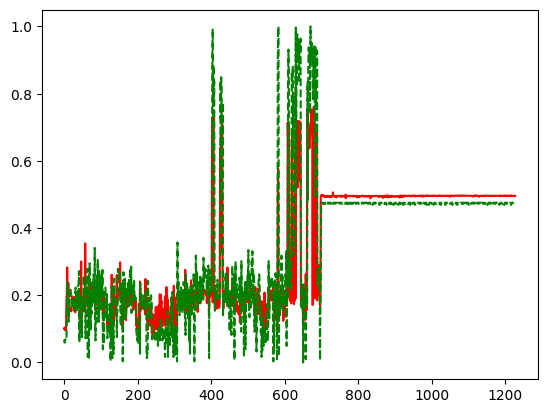

In [136]:
plt.plot(np.arange(len(X_true_test)),regressor.predict(X_true_test),'r')
plt.plot(np.arange(len(X_true_test)),y_true_test,'g--')

plt.show()

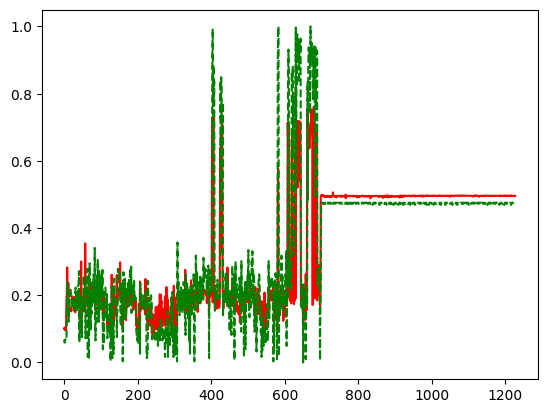

In [137]:
plt.plot(np.arange(len(X_true_test)),regressor.predict(X_true_test),'r')
plt.plot(np.arange(len(X_true_test)),y_true_test,'g--')

plt.show()

The mean squared error (MSE) on test set: 0.1623


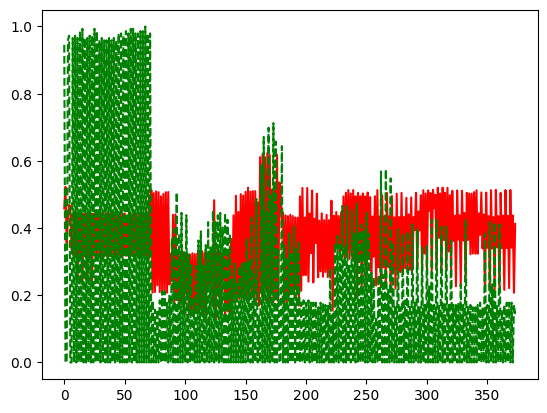

In [139]:
import pandas as pd
df_test = pd.read_csv('test1.csv',on_bad_lines='skip')
df_test.columns = df_test.iloc[0]
df_test = df_test[1:]
df_test = df_test.iloc[:,:-1]
df_test = df_test.astype(float)
df_test = normalize(df_test)
y_true_test = df_test['IPC (Sys + User)']
df_test.drop('IPC (Sys + User)',inplace=True,axis=1)
df_test.drop('CPI (Sys + User)',inplace=True,axis=1)
df_test.drop('Utilization (%)',inplace=True,axis=1)
df_test.drop('Eff Freq',inplace=True,axis=1)
X_true_test = df_test
mse = mean_squared_error(y_true_test, regressor.predict(X_true_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
plt.plot(np.arange(len(X_true_test)),regressor.predict(X_true_test),'r')
plt.plot(np.arange(len(X_true_test)),y_true_test,'g--')
plt.show()